<a href="https://colab.research.google.com/github/CodeHunterOfficial/HeadFirstDesignPatternsJava/blob/main/Chapter1-IntroductionToDesignPatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Java Kernel for Google Colab
This notebook is a template to use Java in Google Colaboratory (inspired by [Google Colab Javascript QuickStart](https://dev.to/obenjiro/silence-of-the-fans-part-1-javascript-quickstart-5f3m)). It uses [IJava](https://github.com/SpencerPark/IJava) as the Jupyter Kernel.
1. Run the cell bellow (click it and press `Shift`+`Enter`),
2. then refresh the page (press `F5`) right after that.

Now you can write Java code. 

In [ ]:
!apt update -q
!apt-get install -q openjdk-11-jdk-headless
!curl -L https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip -o ijava-kernel.zip
!unzip -q ijava-kernel.zip -d ijava-kernel && cd ijava-kernel && python3 install.py --sys-prefix
!jupyter kernelspec list

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu b

# Chapter 1: Introduction to Design Patterns

## Принцип проектирования (Первый из многих принципов проектирования, которые встречаются в этой книге.)
Выделите аспекты приложения, которые
могут изменяться, и отделите их от тех,
которые всегда остаются постоянными.

# Все началось с простого приложения SimUDuck 
Джо работает на компанию, выпустившую чрезвычайно успешный имитатор утиного пруда. В этой игре представлен пруд, в котором плавают и крякают утки разных видов. Проектировщики системы воспользовались стандартным приемом ООП и определили суперкласс Duck, на основе которого объявляются типы конкретных видов уток.

 Все утки умеют крякать (quack) и плавать (swim); суперкласс предоставляет код обобщенной реализации

In [ ]:
public abstract class Duck{
  public void quack() {
    System.out.println("Quack");
  }
  public void swim() {
     System.out.println("Swim");
  }
  public abstract void display();
}

Метод display() объявлен абстрактным, потому что все подтипы отображаются по-разному. Подтип каждой конкретной разновидности реализует свою специфическую версию display().

In [ ]:
public class MallardDuck extends Duck{
  @Override
  public void display(){
    System.out.println("Display in MallardDuck.");
  }
}

In [ ]:
public class RedheadDuck extends Duck{
  @Override
  public void display(){
    System.out.println("Display in RedheadDuck.");
  }
}

In [ ]:
MallardDuck mallardDuck=new MallardDuck();
mallardDuck.quack();
mallardDuck.swim();
mallardDuck.display();

Quack
Swim
 display in MallardDuck.


In [ ]:
RedheadDuck redheadDuck=new RedheadDuck();
redheadDuck.quack();
redheadDuck.swim();
redheadDuck.display();

Quack
Swim
display in RedheadDuck.


## Теперь утки будут ЛЕТАТ
Начальство решило, что летающие утки — именно та «изюминка», которая сокрушит всех конкурентов. И конечно, пообещало, что Джо легко соорудит что-нибудь этакое в течение недели. «В конце концов, он ООП-программист... Какие могут быть трудности?»

## Программист Джо
Я добавлю метод fly() в класс Duck, и он будет унаследован всеми производными классами. Пора продемонстрировать мои таланты в области ООП.

In [3]:
public abstract class Duck{
  public void quack() {
    System.out.println("Quack");
  }
  public void swim() {
     System.out.println("Swim");
  }

  public void fly() {
     System.out.println("Fly");
  }

  public abstract void display();
}

In [5]:
public class MallardDuck extends Duck{
  @Override
  public void display(){
    System.out.println("Display in MallardDuck.");
  }
}

In [7]:
public class RedheadDuck extends Duck{
  @Override
  public void display(){
    System.out.println("Display in RedheadDuck.");
  }
}

In [9]:
MallardDuck mallardDuck=new MallardDuck();
mallardDuck.quack();
mallardDuck.swim();
mallardDuck.fly();
mallardDuck.display();

Quack
Swim
Fly
Display in MallardDuck.


In [11]:
RedheadDuck redheadDuck=new RedheadDuck();
redheadDuck.quack();
redheadDuck.swim();
redheadDuck.fly();
redheadDuck.display();

Quack
Swim
Fly
Display in RedheadDuck.


При размещении fly() в суперклассе летать начинают ВСЕ утки, включая тех, которые летать явно не должны.

В моей иерархии есть небольшой просчет. А вообще симпатично получилось... Может, сделать вид, что так и было задумано?

Резиновые утки не крякают, поэтому метод quack() переопредеделяется

In [22]:
public class RubberDuck extends Duck{
  @Override
  public void display(){
    System.out.println("Display in RubberDuck.");
  }
  public void quack(){}
}

Джо, я на собрании акционеров. В демоверсии по экрану летают резиновые утки. Это что, шутка такая? На премию можешь не рассчитывать...

In [15]:
RubberDuck rubberDuck=new RubberDuck();
rubberDuck.quack();
rubberDuck.swim();
rubberDuck.fly();
rubberDuck.display();

Swim
Fly
Display in RubberDuck.


Казалось бы, в этой ситуации наследование идеально подходит для повторного использования кода — но с сопровождением возникают проблемы. 

Локальное изменение кода привело к нелокальному побочному эффекту (летающие резиновые утки!).


## Джо думает о наследовании
Я всегда могу переопределить метод fly() в классе RubberDuck, по аналогии с quack() ...

Но что произойдет, если в программу добавятся деревянные утки-приманки? Они не должны ни летать, ни крякать...


In [26]:
public class RubberDuck extends Duck{
  @Override
  public void display(){
    System.out.println("Display in RubberDuck.");
  }
  public void quack(){}
  public void fly(){}
}

In [29]:
RubberDuck rubberDuck=new RubberDuck();
rubberDuck.quack();
rubberDuck.swim();
rubberDuck.fly();
rubberDuck.display();

Swim
Display in RubberDuck.


Но что произойдет, если в программу добавятся деревянные утки-приманки? Они не должны ни летать, ни крякать...

Еще один класс в иерархии; деревянные утки не летают и не крякают

In [ ]:
public class DecoyDuck extends Duck{
  @Override
  public void display(){
    System.out.println("Display in DecoyDuck.");
  }
  public void quack(){}
  public void fly(){}
}

## Как насчет интерфейса?

Джо понял, что наследование не решит проблему: он только что получил служебную записку, в которой говорится, что продукт должен обновляться каждые 6 месяцев (причем начальство еще не знает, как именно). Джо знает, что специ фикация будет изменяться, а ему придется искать (и, возможно, переопределять) методы fly() и quack() для каждого нового субкласса, включаемого в программу... бесконечно. Итак, ему нужен более простой способ заставить летать или крякать только некоторых (но не всех!) уток.


## Джо думает. 

Я исключу метод fly() из суперкласса Duck и определю интерфейс Flyable() с методом fly(). Только те утки, которые должны летать, реализуют интерфейс и содержат метод fly()... А я с таким же успехом могу определить интерфейс Quackable, потому что не все утки крякают.


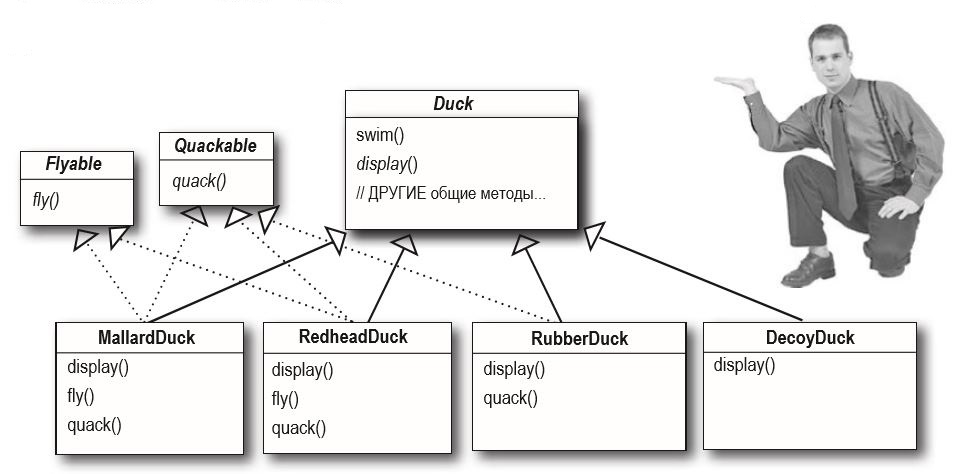

In [58]:
public interface Flyable {
 public void fly();
}

In [61]:
public interface Quackable {
 public void quack();
}

In [66]:
public abstract class Duck{
  public void swim() {
     System.out.println("Swim");
  }
  
  public abstract void display();
}

In [101]:
public class MallardDuck extends Duck implements Flyable, Quackable  {
  @Override
  public void display(){
    System.out.println("Display in MallardDuck.");
  }
  @Override
  public void fly(){
    System.out.println("Fly in MallardDuck.");
  }

  @Override
  public void quack(){
    System.out.println("Quack in MallardDuck.");
  }
}

In [104]:
public class RedheadDuck extends Duck implements Flyable, Quackable  {
  @Override
  public void display(){
    System.out.println("Display in RedheadDuck.");
  }
  @Override
  public void fly(){
    System.out.println("Fly in RedheadDuck.");
  }

  @Override
  public void quack(){
    System.out.println("Quack in RedheadDuck.");
  }
}

In [109]:
public class RubberDuck extends Duck implements Quackable  {
  @Override
  public void display(){
    System.out.println("RubberDuck in RedheadDuck.");
  }

  @Override
  public void quack(){
    System.out.println("Quack in RubberDuck.");
  }
}

In [114]:
public class DecoyDuck extends Duck {
  @Override
  public void display(){
    System.out.println("RubberDuck in RedheadDuck.");
  }
}

## А что ВЫ думаете об этой архитектуре?

По-моему, это самая дурацкая из твоих идей. Как насчет дублирования кода? Тебе не хочется переопределять несколько методов, но как тебе понравится вносить маленькое изменение в поведении fly()... во всех 48 «летающих» субклассах Duck ?!

## А как бы ВЫ поступили на месте Джо?


А как было бы хорошо, если бы программу можно было написать так, чтобы вносимые изменения оказывали минимальное влияние на существующий код... Мы тратили бы меньше времени на переработку и больше — на всякие интересные вещи...

# Захожу на цель...
Итак, наследование нам не подошло, потому что утиное поведение изменяется в субклассах, а некоторые аспекты поведения присутствуют не во всех субклассах. Идея с интерфейсами Flyable и Quackable на первый взгляд выглядит заманчиво, но интерфейсы Java не имеют реализации, что исключает повторное использование кода. И если когда-нибудь потребуется изменить аспект поведения, вам придется искать и изменять его во всех субклассах, где он определяется, — скорее всего, с внесением новых ошибок! К счастью, для подобных ситуаций существует полезный принцип проектирования. 

# Принцип проектирования 

Выделите аспекты приложения, которые могут изменяться, и отделите их от тех, которые всегда остаются постоянными. 

Выделите то, что изменяется, и «инкапсулируйте» эти аспекты, чтобы они не влияли на работу остального кода.
Результат? Меньше непредвиденных последствий от изменения кода, бˆольшая гибкость ваших систем!
 

## Выделяются в отдельную структуру классов.
С чего начать? Если не считать проблем с fly() и quack(), класс Duck работает хорошо, и другие его аспекты вряд ли будут часто изменяться. Таким образом, если не считать нескольких второстепенных модификаций, класс Duck в целом остается неизменным. 

Чтобы отделить «переменное от постоянного», мы создадим два набора классов (совершенно независимых от Duck): один для fly, другой для quack. Каждый набор классов содержит реализацию соответствующего поведения.

### Мы знаем, что fly() и quack() — части класса Duck, изменяющиеся в зависимости от субкласса.

### Чтобы отделить эти аспекты поведения от класса Duck, мы выносим оба метода за пределы класса Duck и создаем новый набор классов для представления каждого аспекта.

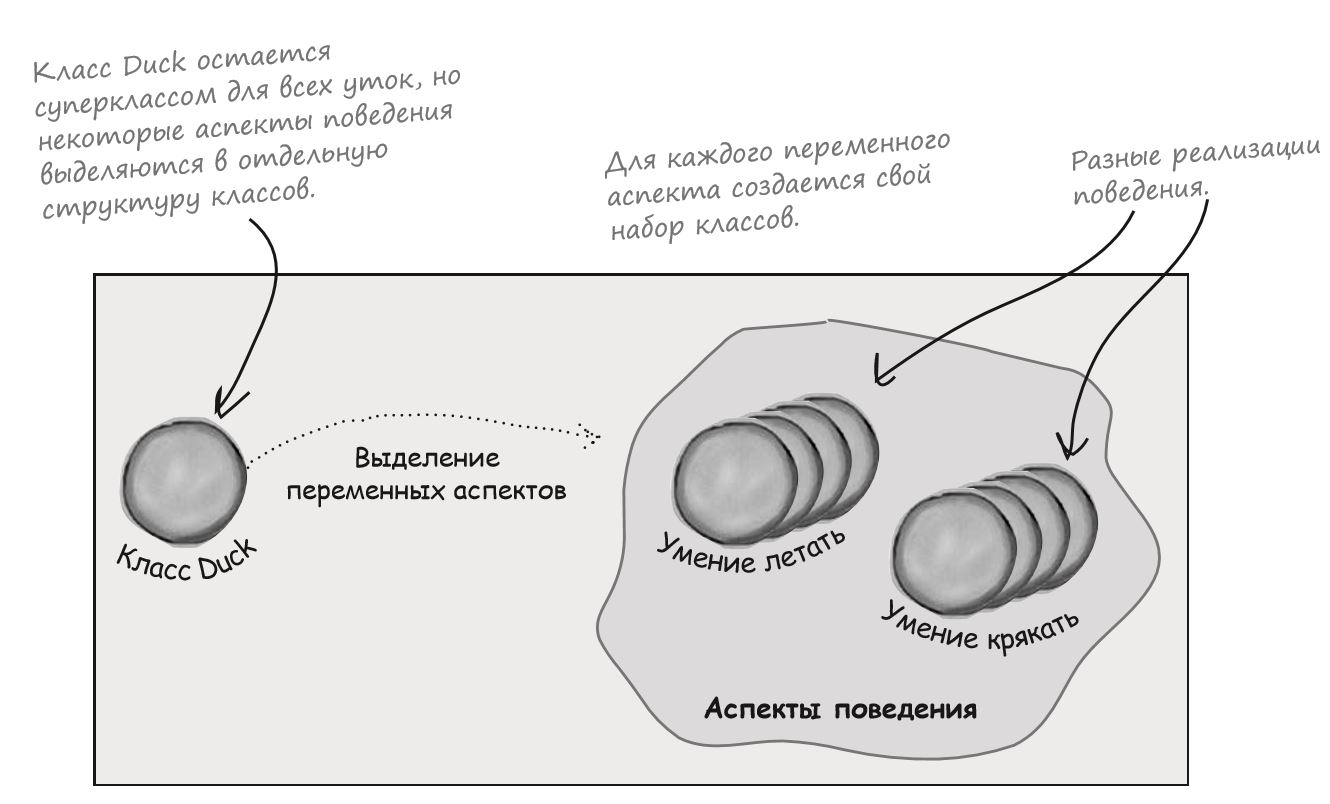

### Отныне аспекты поведения Duck будут находиться в отдельных классах, реализующих интерфейс конкретного аспекта. 
### В этом случае классам Duck не нужно знать подробности реализации своих аспектов поведения.

# Принцип проектирования
Программируйте на уровне интерфейса, а не на уровне реализации.

In [ ]:
public interface FlyBehavior {
 public void fly();
}

In [ ]:
public class FlyWithWings implements FlyBehavior {
 public void fly() {
    System.out.println("I’m flying!!");
 }
}

In [ ]:
public class FlyNoWay implements FlyBehavior {
 public void fly() {
   System.out.println("I can’t fly");
 }
}

In [ ]:
public interface QuackBehavior {
  public void quack();
}

In [ ]:
public class Quack implements QuackBehavior {
 public void quack() {
   System.out.println("Quack");
 }
}

In [ ]:
public class MuteQuack implements QuackBehavior {
 public void quack() {
   System.out.println("<<Silence>>");
 }
}

In [ ]:
public class Squeak implements QuackBehavior {
 public void quack() {
    System.out.println("Squeak");
 }
}

In [ ]:
public abstract class Duck {
  FlyBehavior flyBehavior;
  QuackBehavior quackBehavior;
  public Duck() {
   }
  public abstract void display();
  public void performFly() {
    flyBehavior.fly();
  }
  public void performQuack() {
    quackBehavior.quack();
  }
  public void swim() {
    System.out.println("All ducks float, even decoys!");
 }
}

In [ ]:
public class MallardDuck extends Duck {
  public MallardDuck() {
    quackBehavior = new Quack();
    flyBehavior = new FlyWithWings();
  }
  public void display() {
   System.out.println("I’m a real Mallard duck");
 }
} 

In [ ]:
/*public class MiniDuckSimulator {
 public static void main(String[] args) {
   Duck mallard = new MallardDuck();
   mallard.performQuack();
   mallard.performFly();
 }
}*/
Duck mallard = new MallardDuck();
mallard.performQuack();
mallard.performFly();

Quack
I’m flying!!


#  Динамическое изменение поведения
Согласитесь, обидно было бы наделить наших уток возможностями ди-
намической смены поведения — и не использовать их! Предположим, вы
хотите, чтобы тип поведения задавался set-методом подкласса (вместо
создания экземпляра в конструкторе).

## 1) Добавьте два новых метода в класс Duck:

In [ ]:
public abstract class Duck {
  FlyBehavior flyBehavior;
  QuackBehavior quackBehavior;
  public Duck() {
   }
  public abstract void display();
  public void performFly() {
    flyBehavior.fly();
  }
  public void performQuack() {
    quackBehavior.quack();
  }
  public void swim() {
    System.out.println("All ducks float, even decoys!");
 }
  public void setFlyBehavior(FlyBehavior fb) {
   flyBehavior = fb;
 }
 public void setQuackBehavior(QuackBehavior qb) {
  quackBehavior = qb;
 }
}

Вызывая эти методы в любой момент, мы можем изме-
нить поведение утки «на лету».

## 2) Создайте новый субкласс Duck 

In [ ]:
public class ModelDuck extends Duck {
 public ModelDuck() {
  flyBehavior = new FlyNoWay(); //Утка-приманка изначально летать не умеет
  quackBehavior = new Quack();
 }
 public void display() {
  System.out.println("I’m a model duck");
 }
}

## 3) Определите новый тип FlyBehavior
Определяем новое поведение — реактивный полет.

In [ ]:
public class FlyRocketPowered implements FlyBehavior {
 public void fly() {
   System.out.println("I’m flying with a rocket!");
 }
}

### 4) Внесите изменения в тестовый класс(MiniDuckSimulator. java),  обавьте экземпляр ModelDuck и переведите его на реактивную тягу

In [ ]:
/*public class MiniDuckSimulator {
 public static void main(String[] args) {
  Duck mallard = new MallardDuck();
  mallard.performQuack();
  mallard.performFly();

  Duck model = new ModelDuck();
  //Первый вызов performFly() передается реализации, заданной в конструкторе ModelDuck — то есть экземпляру FlyNoWay
  model.performFly();
  //Вызываем set-метод, унаследованный классом ModelDuck, и... утка- приманка вдруг взлетает на реактивном двигателе!
  model.setFlyBehavior(new FlyRocketPowered());
  //Способность утки-приманки к полету переключается динамически! Если бы реализация находилась в иерархии Duck, ТАКОЕ было бы невозможно.
  model.performFly();
 }
}
*/

Duck mallard = new MallardDuck();
mallard.performQuack();
mallard.performFly();

Duck model = new ModelDuck();
//Первый вызов performFly() передается реализации, заданной в конструкторе ModelDuck — то есть экземпляру FlyNoWay
model.performFly();
//Вызываем set-метод, унаследованный классом ModelDuck, и... утка- приманка вдруг взлетает на реактивном двигателе!
model.setFlyBehavior(new FlyRocketPowered());
//Способность утки-приманки к полету переключается динамически! Если бы реализация находилась в иерархии Duck, ТАКОЕ было бы невозможно.
model.performFly();

Quack
I’m flying!!
I can’t fly
I’m flying with a rocket!


## Принцип проектирования
Отдавайте предпочтение композиции перед наследованием

# Мозговой штурм
Утиный манок используется охотниками для имитации утиного кряканья. Как бы вы реализовали собственную версию утиного манка, которая не является производной от класса Duck?